In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

In [142]:
# load raw data frames
raw_covid_cases_df = pd.read_csv("../data/RAW_us_confirmed_cases.csv")
raw_mask_mandates_df = pd.read_csv("../data/mask-mandates-by-county.csv")
raw_mask_use_df = pd.read_csv("../data/mask-use-by-county.csv")

In [143]:
raw_covid_cases_df

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,9967,10043,10047,10048,10061,10083,10219,10228,10239,10252
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37224,37245,37258,37266,37285,37325,37350,37372,37398,37414
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3575,3577,3578,3578,3583,3595,3596,3596,3599,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4246,4251,4252,4253,4256,4262,4275,4276,4278,4279
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10179,10192,10197,10207,10227,10338,10364,10371,10395,10406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5119,5119,5119,5152,5164,5168,5185,5204,5204,5204
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3781,3781,3781,3794,3805,3814,3817,3829,3829,3829
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1677,1677,1677,1690,1700,1715,1719,1731,1731,1731


In [144]:
raw_mask_mandates_df

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1593864,VI,St. Thomas Island,78,30,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593865,VI,St. Thomas Island,78,30,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593866,VI,St. Thomas Island,78,30,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593867,VI,St. Thomas Island,78,30,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."


In [145]:
raw_mask_use_df

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [146]:
state = "New Jersey"
state_abrev = "NJ"
county = "Bergen County"
county_abrev = "Bergen"

start_date = datetime.datetime(2020, 2, 1, 0, 0) # feb 1st 2020
end_date = datetime.datetime(2021, 10, 15, 0, 0) # oct 15 2021

## Data cleaning
We are dealing with only a subset of the data for a given county. We filter down the confirmed COVID cases dataset, masking mandate dataset and masking survey dataset to that particular region only.

In [147]:
# filter down confirmed cases datasets
cases_df = raw_covid_cases_df.loc[(raw_covid_cases_df['Province_State'] == state) & (raw_covid_cases_df['Admin2'] == county_abrev)].head(1)

# filter down mask mandage datasets
mandates_df = raw_mask_mandates_df[(raw_mask_mandates_df['State_Tribe_Territory'] == state_abrev) & (raw_mask_mandates_df['County_Name'] == county)]

# get the fips code for Bergen NJ
fips = cases_df['FIPS'].astype(int).values[0]

# filter down mask use datasets
masking_df = raw_mask_use_df[raw_mask_use_df['COUNTYFP'] == fips]

In [148]:
#
# CONFIRMED CASES DATASET DATA CLEANUP
#
# remove unnecessary columns for confirmed cases & transpose
cases_df = cases_df.reset_index().drop(['index','Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
cases_df = cases_df.transpose().reset_index()
# confirmed cases dataset : rename & filter for specific timeframe
cases_df['index'] = pd.to_datetime(cases_df['index'])
cases_df = cases_df.rename(columns={'index': 'doy', 0: 'cases_count'})
cases_df = cases_df[(cases_df['doy'] >= start_date) & (cases_df['doy'] <= end_date)]

In [149]:
#
# MASK MANDATES DATASET DATA CLEANUP
#
mandates_df = mandates_df.drop(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County', 'Source_of_Action', 'URL', 'Citation'], axis=1)
mandates_df = mandates_df.reset_index().drop(['index'], axis=1)
mandates_df['date'] = pd.to_datetime(mandates_df['date'])
mandates_df = mandates_df[(mandates_df['date'] >= start_date) & (mandates_df['date'] <= end_date)]

In [150]:
# save data
cases_df.to_csv("../data_clean/cases.csv")
mandates_df.to_csv("../data_clean/mandates.csv")
masking_df.to_csv("../data_clean/masking.csv")

Plotting the number of cases in the `cases_df` dataset, we see that the reported no of cases is actually the total number of cases per day. We are interested in looking at the derivative, that is, the increase day over day of COVID cases. To do that, we need to cleanup the dataset.

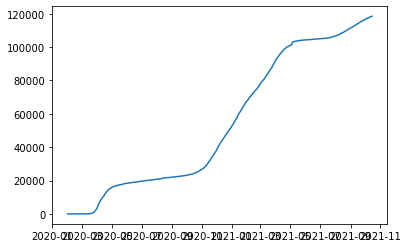

In [151]:
plt.plot(cases_df.doy, cases_df.cases_count)

In [152]:
def derivative(row):
    # from a given row, look at yesterday's row to figure out the increase
    date = row['doy']
    yesterday = date - pd.Timedelta(days=1)
    today_count = row['cases_count']
    yesterday_count = 0
    yesterday_case_count = cases_df[cases_df['doy'] == yesterday].head(1)
    if yesterday_case_count.shape[0] == 1:
        yesterday_count = yesterday_case_count['cases_count'].astype(int).values[0]
    return today_count - yesterday_count

cases_df['dod_increase'] = cases_df.apply(derivative, axis=1)

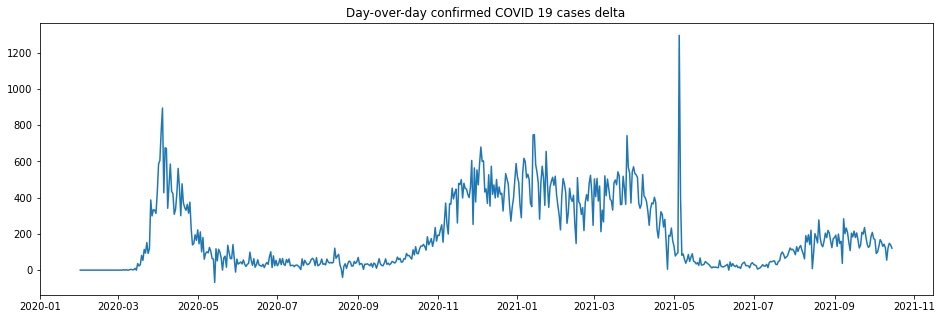

In [153]:
plt.figure(figsize=(16,5))
plt.title("Day-over-day confirmed COVID 19 cases delta")
plt.plot(cases_df.doy, cases_df.dod_increase)

Let's plot the dates from which masking became in place alongside that graph.

In [154]:
def policy_change(row):
    date = row['date']
    yesterday = date - pd.Timedelta(days=1)
    today_order = row['Face_Masks_Required_in_Public']
    yesterday_order = 'No'
    yesterday_order_df = mandates_df[mandates_df['date'] == yesterday].head(1)
    if yesterday_order_df.shape[0] == 1:
        yesterday_order = yesterday_order_df['Face_Masks_Required_in_Public'].astype(str).values[0]
    return "change" if today_order != yesterday_order else "no_change"

mandates_df['policy_change'] = mandates_df.apply(policy_change, axis=1)
mandates_df[mandates_df['policy_change'] == "change"]

,date,order_code,Face_Masks_Required_in_Public,policy_change
0,2020-04-10,1,Yes,change
413,2021-05-28,2,No,change


Face masks mandate only changed onces from being required -> not required on 2021-05-28 for Bergen County NJ.

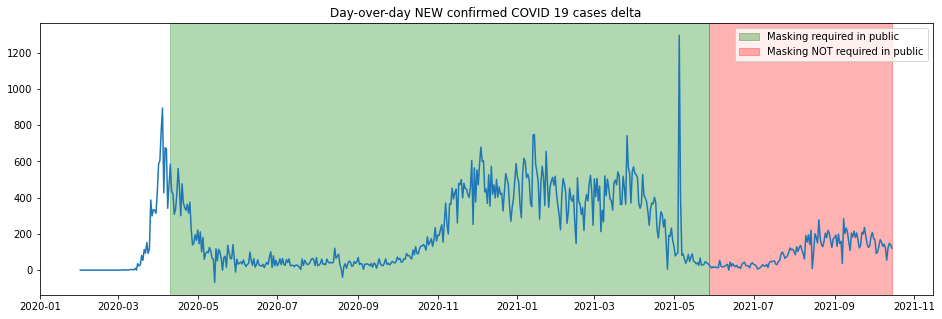

In [155]:
plt.figure(figsize=(16,5))
plt.title("Day-over-day NEW confirmed COVID 19 cases delta")
plt.plot(cases_df.doy, cases_df.dod_increase)

plt.axvspan(date2num(datetime.datetime(2020,4,10)), date2num(datetime.datetime(2021,5,28)), color="green", alpha=0.3, label="Masking required in public")
plt.axvspan(date2num(datetime.datetime(2021,5,28)), date2num(end_date), color="red", alpha=0.3, label="Masking NOT required in public")
plt.legend()

It seems like the first introduction of a masking policy mandate in 2020/04/10 contributed to flattening the curve, at least in the increase of cases a few days after it got introduced. Removal of the masking policy was OK considering that there were no constant increases around May 2021.

Something worth noting here, there is a delay between the time of infection and the time a case is confirmed. Hence the effect of the masking policy can been seen a few days after it got introduced. We are interesting in knowing that delay, on average, based on the data. Hence we zoom on the 2020/04/10 area to figure out that delay.

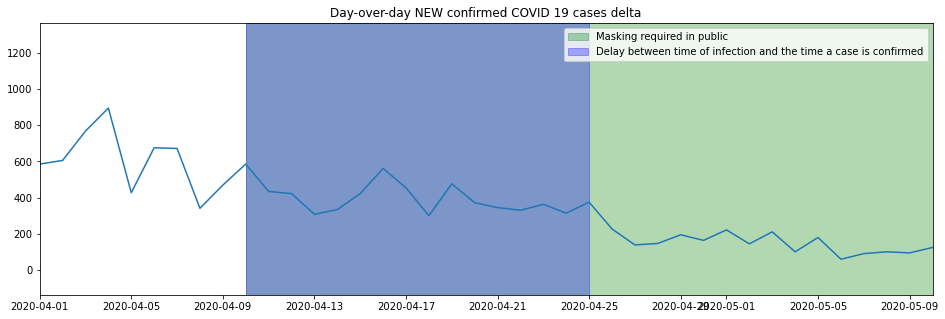

In [156]:
plt.figure(figsize=(16,5))
plt.title("Day-over-day NEW confirmed COVID 19 cases delta")
plt.plot(cases_df.doy, cases_df.dod_increase)

plt.xlim(date2num(datetime.datetime(2020,4,1)), date2num(datetime.datetime(2020,5,10)))
plt.axvspan(date2num(datetime.datetime(2020,4,10)), date2num(datetime.datetime(2021,5,28)), color="green", alpha=0.3, label="Masking required in public")
plt.axvspan(date2num(datetime.datetime(2020,4,10)), date2num(datetime.datetime(2020,4,25)), color="blue", alpha=0.3, label="Delay between time of infection and the time a case is confirmed")
plt.legend()

We're particularily interested in the delay for which we can see the masking mandate have an effect on the daily increase of COVID 19 cases. That is, what is the time delay for which we can see a decrease in the new number of daily cases AFTER having the masking mandate implemented.

Here we can see that after the masking mandate got implemented on **2020-04-10**, the first decrease in new cases of COVID 19 we can observe in the data is roughly around **2020-04-25**. Which means that, according to the data observed, the average delay between the time of infection and the time a case is confirmed is roughly **14 days**. This also follows the CDC observations.

In [157]:
masking_df

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1775,34003,0.02,0.014,0.053,0.151,0.762


It also seems like the vast majority of people in Bergen County are okay complying with masking mandates, making this data more reliable.

We can now look at the graph of new cases increase difference day over day with the masking mandate taking into consideration the 14 incubation period shift.

In [158]:
def derivative(row):
    # from a given row, look at yesterday's row to figure out the increase
    date = row['doy']
    yesterday = date - pd.Timedelta(days=1)
    today_count = row['dod_increase']
    yesterday_count = 0
    yesterday_case_count = cases_df[cases_df['doy'] == yesterday].head(1)
    if yesterday_case_count.shape[0] == 1:
        yesterday_count = yesterday_case_count['dod_increase'].astype(int).values[0]
    return today_count - yesterday_count

cases_df['dod_increase_slope'] = cases_df.apply(derivative, axis=1)
cases_df

,doy,cases_count,dod_increase,dod_increase_slope
10,2020-02-01,0,0,0
11,2020-02-02,0,0,0
12,2020-02-03,0,0,0
13,2020-02-04,0,0,0
14,2020-02-05,0,0,0
...,...,...,...,...
628,2021-10-11,117928,55,-68
629,2021-10-12,118050,122,67
630,2021-10-13,118198,148,26
631,2021-10-14,118337,139,-9


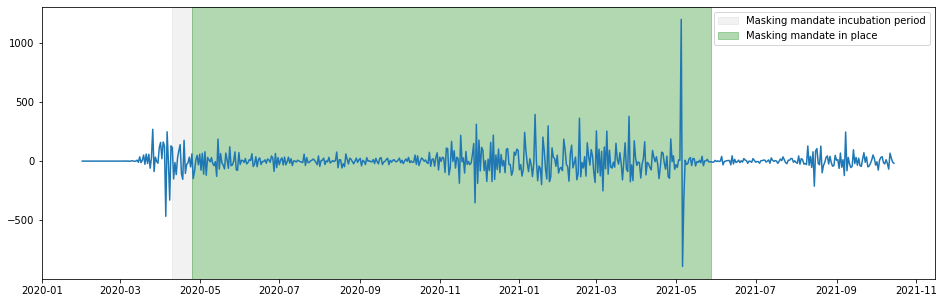

In [159]:
plt.figure(figsize=(16,5))

plt.plot(cases_df.doy, cases_df.dod_increase_slope)

plt.axvspan(date2num(datetime.datetime(2020,4,10)), date2num(datetime.datetime(2020,4,25)), color="gray", alpha=0.1, label="Masking mandate incubation period")
plt.axvspan(date2num(datetime.datetime(2020,4,25)), date2num(datetime.datetime(2021,5,28)), color="green", alpha=0.3, label="Masking mandate in place")
plt.legend()

In [160]:
# load mobility reports
google_mobility_df = pd.read_csv("../data/COVID19_mobility/google_reports/mobility_report_US.csv")
apple_mobility_df = pd.read_csv("../data/COVID19_mobility/apple_reports/apple_mobility_report_US.csv")

google_mobility_df = google_mobility_df[google_mobility_df['county'] == county]
apple_mobility_df = apple_mobility_df[apple_mobility_df["county_and_city"] == county]

In [161]:
google_mobility_df

,state,county,date,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential
939572,New Jersey,Bergen County,2020-02-15,-1.0,-5.0,0.0,1.0,1.0,0.0
939573,New Jersey,Bergen County,2020-02-16,1.0,-8.0,-3.0,-8.0,-1.0,0.0
939574,New Jersey,Bergen County,2020-02-17,18.0,2.0,78.0,-20.0,-41.0,9.0
939575,New Jersey,Bergen County,2020-02-18,1.0,-2.0,-3.0,-2.0,-9.0,2.0
939576,New Jersey,Bergen County,2020-02-19,0.0,-1.0,17.0,-2.0,-2.0,1.0
...,...,...,...,...,...,...,...,...,...
940225,New Jersey,Bergen County,2021-11-29,-6.0,0.0,17.0,-22.0,-32.0,9.0
940226,New Jersey,Bergen County,2021-11-30,-9.0,3.0,14.0,-23.0,-28.0,9.0
940227,New Jersey,Bergen County,2021-12-01,-9.0,2.0,29.0,-22.0,-30.0,9.0
940228,New Jersey,Bergen County,2021-12-02,-10.0,5.0,29.0,-24.0,-29.0,9.0


In [162]:
apple_mobility_df

,state,county_and_city,geo_type,date,driving,transit,walking
818134,New Jersey,Bergen County,county,2020-01-13,0.00,0.00,0.00
818135,New Jersey,Bergen County,county,2020-01-14,3.64,-3.39,-2.33
818136,New Jersey,Bergen County,county,2020-01-15,6.22,0.08,4.09
818137,New Jersey,Bergen County,county,2020-01-16,7.38,-4.46,-1.93
818138,New Jersey,Bergen County,county,2020-01-17,22.31,-1.64,16.86
...,...,...,...,...,...,...,...
818821,New Jersey,Bergen County,county,2021-12-01,45.78,17.30,57.12
818822,New Jersey,Bergen County,county,2021-12-02,44.24,13.02,56.24
818823,New Jersey,Bergen County,county,2021-12-03,70.84,32.67,83.26
818824,New Jersey,Bergen County,county,2021-12-04,70.75,44.96,106.79


In [163]:
# merge apple and google mobility datasets together
mobility_df = pd.merge(left=google_mobility_df, right=apple_mobility_df, how='inner', on='date')

# merge transit mobility scores
mobility_df['transit_avg'] = mobility_df[['transit stations', 'transit']].mean(axis=1)

# drop columns
mobility_df = mobility_df.drop(columns=['state_x', 'state_y', 'county', 'county_and_city', 'geo_type', 'transit', 'transit stations'])

# rename columns
mobility_df = mobility_df.rename(columns={'transit_avg': 'transit'})
mobility_df['date'] = mobility_df['date'].apply(pd.to_datetime)

Here we merge the daily mobility report with the cases.

In [164]:
# merge the cases data w/ the mobility data
cases_df = pd.merge(left=cases_df, right=mobility_df, left_on='doy', right_on='date')
cases_df = cases_df.drop(columns=['date'])
cases_df = cases_df.rename(columns={
    "retail and recreation": "retail_rec",
    "grocery and pharmacy": "grocery_pharmacy",
})
cases_df

,doy,cases_count,dod_increase,dod_increase_slope,retail_rec,grocery_pharmacy,parks,workplaces,residential,driving,walking,transit
0,2020-02-15,0,0,0,-1.0,-5.0,0.0,1.0,0.0,19.21,22.96,0.950
1,2020-02-16,0,0,0,1.0,-8.0,-3.0,-1.0,0.0,-10.59,-11.41,-9.215
2,2020-02-17,0,0,0,18.0,2.0,78.0,-41.0,9.0,8.95,17.85,-7.525
3,2020-02-18,0,0,0,1.0,-2.0,-3.0,-9.0,2.0,3.16,3.30,-2.330
4,2020-02-19,0,0,0,0.0,-1.0,17.0,-2.0,1.0,5.42,7.04,-3.035
...,...,...,...,...,...,...,...,...,...,...,...,...
603,2021-10-11,117928,55,-68,3.0,7.0,120.0,-45.0,11.0,59.49,75.69,11.110
604,2021-10-12,118050,122,67,-7.0,5.0,108.0,-30.0,8.0,50.01,66.21,2.900
605,2021-10-13,118198,148,26,-10.0,2.0,91.0,-31.0,8.0,53.05,69.20,3.415
606,2021-10-14,118337,139,-9,-9.0,4.0,107.0,-30.0,7.0,60.70,69.59,8.095


It doesn't really make sense to look at the difference in increases over time since it takes into account the logistics delay of entering data into the system. Instead we proceed by average the number of new cases in buckets to get a clearer picture. We set the bucket size to 14 to counter balance that incubation period.

In [170]:
doy_cases_df = cases_df.set_index("doy")
doy_cases_df = doy_cases_df.resample("14D").agg({
    'dod_increase': 'mean',
    'dod_increase_slope': 'mean',
    'retail_rec': 'mean',
    'grocery_pharmacy': 'mean',
    'parks': 'mean',
    'workplaces': 'mean',
    'residential': 'mean',
    'driving': 'mean',
    'walking': 'mean',
    'transit': 'mean'
})
doy_cases_df

,dod_increase,dod_increase_slope,retail_rec,grocery_pharmacy,parks,workplaces,residential,driving,walking,transit
doy,,,,,,,,,,
2020-02-15,0.000000,0.000000,1.285714,-0.857143,24.285714,-2.642857,0.857143,7.365000,6.859286,-2.567143
2020-02-29,1.071429,0.142857,0.928571,13.285714,47.642857,-0.500000,1.571429,5.437143,7.218571,-8.356786
2020-03-14,106.428571,21.214286,-44.428571,-5.714286,35.571429,-45.142857,22.142857,-47.442143,-33.420714,-57.267500
2020-03-28,530.214286,20.428571,-65.642857,-13.000000,-27.357143,-63.571429,29.357143,-58.873571,-43.442143,-70.488571
2020-04-11,388.214286,-19.357143,-68.571429,-26.071429,-33.714286,-62.714286,28.857143,-53.416429,-41.109286,-71.140000
2020-04-25,168.428571,-15.214286,-60.785714,-19.714286,10.357143,-57.428571,25.642857,-41.205000,-23.502857,-63.246786
2020-05-09,69.785714,-1.714286,-51.928571,-13.000000,73.642857,-52.214286,23.071429,-20.803333,-1.865714,-57.577143
2020-05-23,60.214286,-1.500000,-48.000000,-11.428571,94.428571,-48.071429,21.357143,-11.290714,14.317857,-52.282143
2020-06-06,38.500000,-2.500000,-40.000000,-4.714286,139.214286,-41.285714,17.285714,6.897857,34.427143,-43.687143


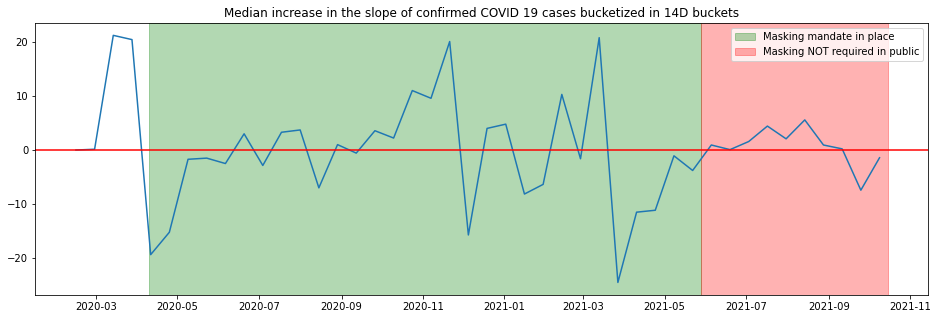

In [171]:
plt.figure(figsize=(16,5))

plt.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope)
plt.title("Median increase in the slope of confirmed COVID 19 cases bucketized in 14D buckets")

plt.axhline(y=0, color="red")
plt.axvspan(date2num(datetime.datetime(2020,4,10)), date2num(datetime.datetime(2021,5,28)), color="green", alpha=0.3, label="Masking mandate in place")
plt.axvspan(date2num(datetime.datetime(2021,5,28)), date2num(end_date), color="red", alpha=0.3, label="Masking NOT required in public")

plt.legend()

We can see in the graph below that introducing the masking mandate and having the people comply to it was enough to flatten the curve and at least stop this constant increases in new COVID 19 cases day over day. You see the number of cases falling after the first introduction of the masking mandate and the increase in the average number of new cases every day stay around the 0 line after the introduction of the masking mandate.

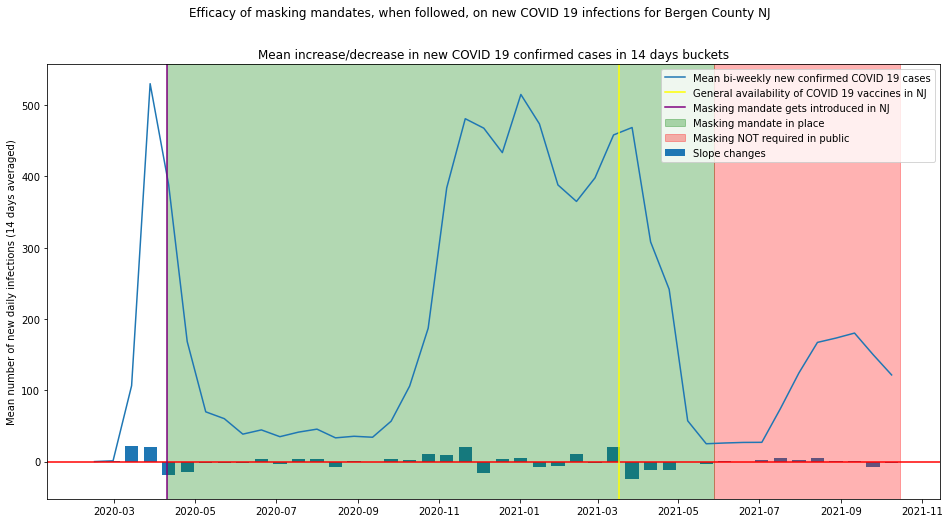

In [172]:
fig, ax = plt.subplots(1, figsize=(16,8))
fig.suptitle("Efficacy of masking mandates, when followed, on new COVID 19 infections for Bergen County NJ")

ax.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase, label="Mean bi-weekly new confirmed COVID 19 cases")
ax.set_title("Mean increase/decrease in new COVID 19 confirmed cases in 14 days buckets")
ax.axhline(y=0, color="red")
ax.axvspan(date2num(datetime.datetime(2020,4,10)), date2num(datetime.datetime(2021,5,28)), color="green", alpha=0.3, label="Masking mandate in place")
ax.axvspan(date2num(datetime.datetime(2021,5,28)), date2num(end_date), color="red", alpha=0.3, label="Masking NOT required in public")
ax.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")
ax.axvline(x=date2num(datetime.datetime(2020,4,10)), color="purple", label="Masking mandate gets introduced in NJ")
ax.set_ylabel("Mean number of new daily infections (14 days averaged)")

ax.legend()

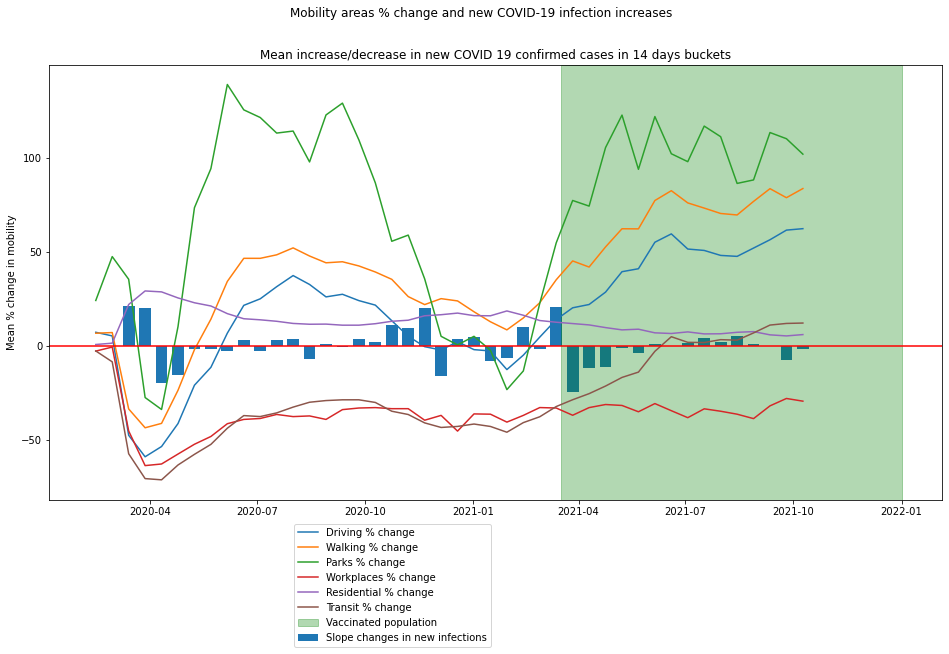

In [259]:
fig, ax = plt.subplots(1, figsize=(16,8))
fig.suptitle("Mobility areas % change and new COVID-19 infection increases")

ax.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes in new infections", width=10)
ax.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.driving, label="Driving % change")
ax.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.walking, label="Walking % change")
ax.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.parks, label="Parks % change")
ax.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.workplaces, label="Workplaces % change")
ax.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.residential, label="Residential % change")
ax.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.transit, label="Transit % change")

ax.set_title("Mean increase/decrease in new COVID 19 confirmed cases in 14 days buckets")
ax.axhline(y=0, color="red")

ax.axvspan(date2num(datetime.datetime(2021,3,17)), date2num(datetime.datetime(2022, 1, 1)), color="green", alpha=0.3, label="Vaccinated population")

ax.set_ylabel("Mean % change in mobility")

ax.legend(loc="lower right", bbox_to_anchor=(0.5, -0.35))

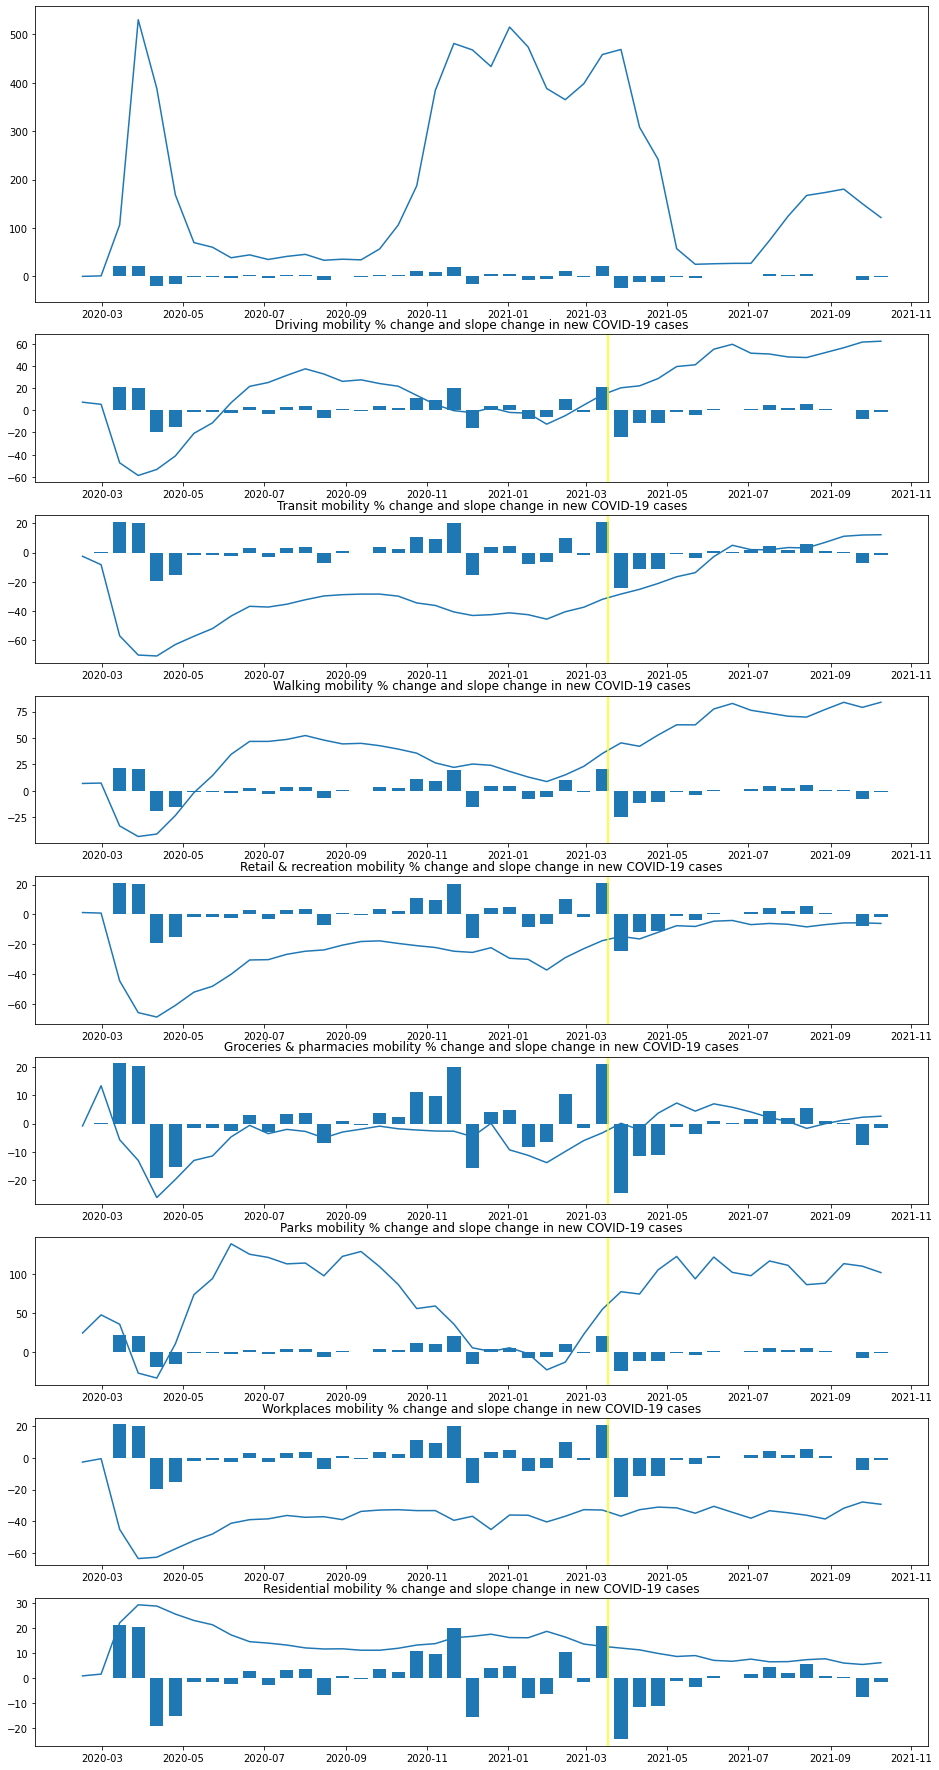

In [255]:
from matplotlib import gridspec

fig = plt.figure(figsize=(16,32))
gs = gridspec.GridSpec(9, 1, height_ratios=[2, 1, 1, 1, 1, 1, 1, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax0.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase, label="Mean bi-weekly new confirmed COVID 19 cases")

# retail_rec	grocery_pharmacy	parks	workplaces	residential

# driving
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax1.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.driving, label="Driving % change")
ax1.set_title("Driving mobility % change and slope change in new COVID-19 cases")
ax1.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")

# transit
ax2 = plt.subplot(gs[2], sharex=ax0)
ax2.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax2.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.transit, label="Transit % change")
ax2.set_title("Transit mobility % change and slope change in new COVID-19 cases")
ax2.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")


# walking
ax3 = plt.subplot(gs[3], sharex=ax0)
ax3.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax3.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.walking, label="Walking % change")
ax3.set_title("Walking mobility % change and slope change in new COVID-19 cases")
ax3.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")


# retail_rec
ax4 = plt.subplot(gs[4], sharex=ax0)
ax4.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax4.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.retail_rec, label="Retail & Recreation % change")
ax4.set_title("Retail & recreation mobility % change and slope change in new COVID-19 cases")
ax4.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")


# grocery_pharmacy
ax5 = plt.subplot(gs[5], sharex=ax0)
ax5.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax5.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.grocery_pharmacy, label="Groceries & Pharmacies % change")
ax5.set_title("Groceries & pharmacies mobility % change and slope change in new COVID-19 cases")
ax5.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")


# parks
ax6 = plt.subplot(gs[6], sharex=ax0)
ax6.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax6.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.parks, label="Parks % change")
ax6.set_title("Parks mobility % change and slope change in new COVID-19 cases")
ax6.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")


# workplaces
ax7 = plt.subplot(gs[7], sharex=ax0)
ax7.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax7.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.workplaces, label="Workplaces % change")
ax7.set_title("Workplaces mobility % change and slope change in new COVID-19 cases")
ax7.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")


# residential
ax8 = plt.subplot(gs[8], sharex=ax0)
ax8.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax8.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.residential, label="Residential % change")
ax8.set_title("Residential mobility % change and slope change in new COVID-19 cases")
ax8.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")


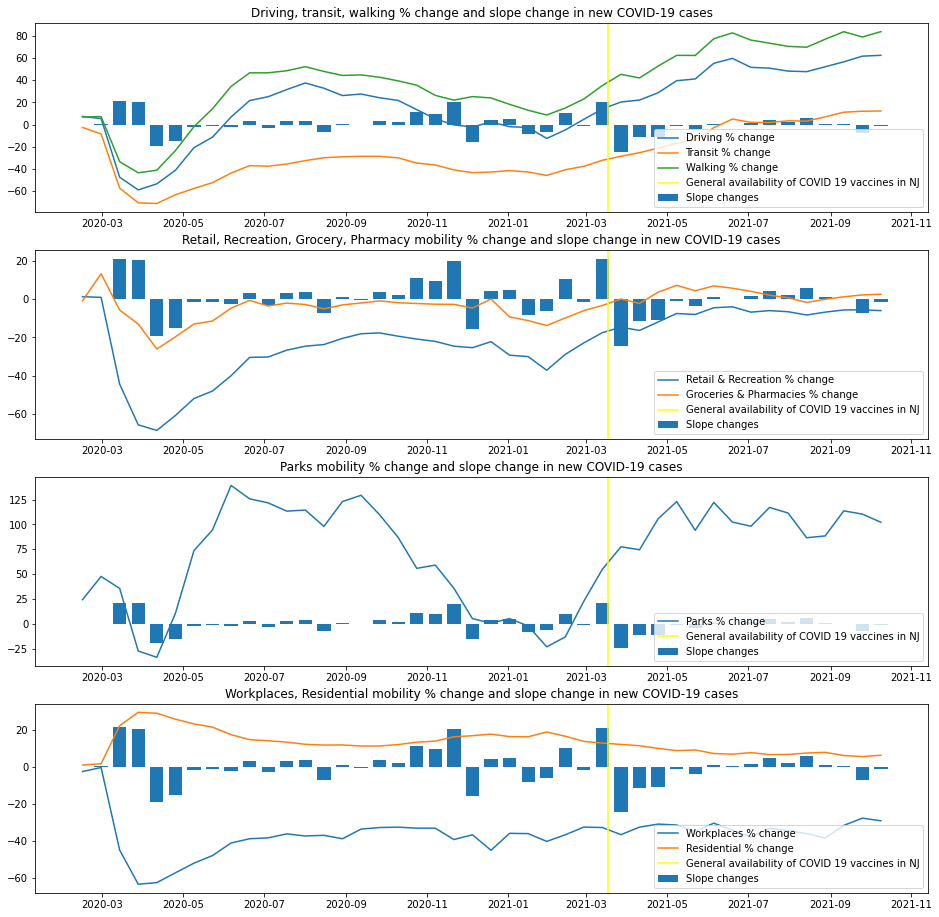

In [268]:
from matplotlib import gridspec

fig = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1])

# retail_rec	grocery_pharmacy	parks	workplaces	residential

# driving, transit, walking
ax1 = plt.subplot(gs[0], sharex=ax0)
ax1.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax1.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.driving, label="Driving % change")
ax1.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.transit, label="Transit % change")
ax1.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.walking, label="Walking % change")
ax1.set_title("Driving, transit, walking % change and slope change in new COVID-19 cases")
ax1.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")
ax1.legend(loc="lower right")

# retail_rec, grocery_pharmacy
ax2 = plt.subplot(gs[1], sharex=ax0)
ax2.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax2.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.retail_rec, label="Retail & Recreation % change")
ax2.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.grocery_pharmacy, label="Groceries & Pharmacies % change")
ax2.set_title("Retail, Recreation, Grocery, Pharmacy mobility % change and slope change in new COVID-19 cases")
ax2.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")
ax2.legend(loc="lower right")

# parks
ax3 = plt.subplot(gs[2], sharex=ax0)
ax3.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax3.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.parks, label="Parks % change")
ax3.set_title("Parks mobility % change and slope change in new COVID-19 cases")
ax3.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")
ax3.legend(loc="lower right")

# workplaces, residential
ax4 = plt.subplot(gs[3], sharex=ax0)
ax4.bar(doy_cases_df.index.to_pydatetime(), doy_cases_df.dod_increase_slope, label="Slope changes", width=10)
ax4.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.workplaces, label="Workplaces % change")
ax4.plot(doy_cases_df.index.to_pydatetime(), doy_cases_df.residential, label="Residential % change")
ax4.set_title("Workplaces, Residential mobility % change and slope change in new COVID-19 cases")
ax4.axvline(x=date2num(datetime.datetime(2021,3,17)), color="yellow", label="General availability of COVID 19 vaccines in NJ")
ax4.legend(loc="lower right")

In [269]:
doy_cases_df.corr()

,dod_increase,dod_increase_slope,retail_rec,grocery_pharmacy,parks,workplaces,residential,driving,walking,transit
dod_increase,1.000000,0.029705,-0.321841,-0.435945,-0.738710,-0.312190,0.457909,-0.469693,-0.413548,-0.426295
dod_increase_slope,0.029705,1.000000,0.014353,0.137842,-0.035571,0.015747,0.026263,-0.078759,-0.083610,-0.033646
retail_rec,-0.321841,0.014353,1.000000,0.885962,0.495602,0.816059,-0.972833,0.853290,0.802786,0.908273
grocery_pharmacy,-0.435945,0.137842,0.885962,1.000000,0.611672,0.721493,-0.855422,0.764242,0.727494,0.775195
parks,-0.738710,-0.035571,0.495602,0.611672,1.000000,0.268285,-0.560626,0.754116,0.759491,0.556788
workplaces,-0.312190,0.015747,0.816059,0.721493,0.268285,1.000000,-0.858584,0.516103,0.419275,0.650123
residential,0.457909,0.026263,-0.972833,-0.855422,-0.560626,-0.858584,1.000000,-0.856838,-0.787608,-0.926350
driving,-0.469693,-0.078759,0.853290,0.764242,0.754116,0.516103,-0.856838,1.000000,0.987060,0.895665
walking,-0.413548,-0.083610,0.802786,0.727494,0.759491,0.419275,-0.787608,0.987060,1.000000,0.852608
transit,-0.426295,-0.033646,0.908273,0.775195,0.556788,0.650123,-0.926350,0.895665,0.852608,1.000000
